In [39]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#trying to improve pandas plotting output 

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

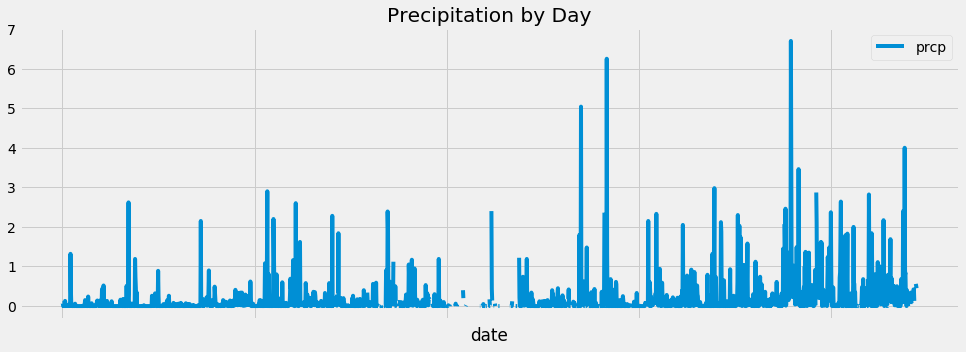

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

#Find last row 
# last  = session.query(Measurement).order_by(Measurement.date.desc()).first()
# last.__dict__
#Last row is 2017-08-23

# Perform a query to retrieve the data and precipitation scores

last_year = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)

# session.query(Measurement.date, Measurement.prcp).\
# session.query(Measurement.prcp).\
#     filter(func.strftime(last_year, Measurement.date) == date_str).all()

# lastyear_prcp = session.query(Measurement).filter(Measurement(dt.datetime(2017, 8, 23) - dt.timedelta(days=365)))
lastyear_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).all()
# print(lastyear_prcp)
    
# Save the query results as a Pandas DataFrame and set the index to the date column

lyp_df = pd.DataFrame(lastyear_prcp)

lyp_df.set_index("date", inplace=True)

# Sort the dataframe by date
## Already done? 

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(15,5))
lyp_df.plot(ax = ax, title="Precipitation by Day")
plt.show()

#try to get this to format right??? 


In [48]:
print(lyp_df.to_string())
#why do i have 2200 rows?? 

            prcp
date            
2016-08-24  0.08
2016-08-25  0.08
2016-08-26  0.00
2016-08-27  0.00
2016-08-28  0.01
2016-08-29  0.00
2016-08-30  0.00
2016-08-31  0.13
2016-09-01  0.00
2016-09-02  0.00
2016-09-03  0.00
2016-09-04  0.03
2016-09-05   NaN
2016-09-06   NaN
2016-09-07  0.05
2016-09-08  0.00
2016-09-09  0.03
2016-09-10  0.00
2016-09-11  0.05
2016-09-12  0.00
2016-09-13  0.02
2016-09-14  1.32
2016-09-15  0.42
2016-09-16  0.06
2016-09-17  0.05
2016-09-18  0.00
2016-09-19  0.00
2016-09-20  0.00
2016-09-21  0.00
2016-09-22  0.02
2016-09-23  0.00
2016-09-24  0.00
2016-09-25  0.00
2016-09-26  0.06
2016-09-27  0.02
2016-09-28  0.00
2016-09-29  0.00
2016-09-30  0.00
2016-10-01  0.00
2016-10-02  0.00
2016-10-03  0.00
2016-10-04  0.00
2016-10-05  0.00
2016-10-06  0.00
2016-10-07  0.00
2016-10-08  0.00
2016-10-09  0.00
2016-10-10  0.00
2016-10-11  0.00
2016-10-12  0.00
2016-10-13  0.00
2016-10-14  0.00
2016-10-15  0.00
2016-10-16  0.00
2016-10-17  0.01
2016-10-18  0.00
2016-10-19  0.

![precipitation](Images/precipitation.png)

In [44]:
# Use Pandas to calcualte the summary statistics for the precipitation data

lyp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
